<a href="https://colab.research.google.com/github/ktjayamanna/Face-Detection-Using-Open-CV-Haar-Cascade/blob/master/Eye_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import scipy as sp
import urllib.request
import imutils
from PIL import Image

In [21]:
#Get the URL for the Haar Cascade
HaarCascadeURL = 'https://github.com/opencv/opencv/tree/master/data/haarcascades'

#Get the Name of the Haar Cascade Version
HaarName = 'haarcascade_frontalface_default.xml'

urllib.request.urlretrieve(HaarCascadeURL,HaarName)

#Read the Subject Image
TrumpImage = cv2.imread('trump.jpg')

In [22]:
# Initialize the Classifiers
detector = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
EyeDetector = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')

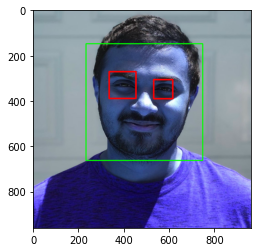

In [23]:
# Eye Detection
def DetectFacesEyes(image):
    #Save a copy that will be subjected to operations.
    TempCopy = image
    #Convert to grayscale
    Gray = cv2.cvtColor(TempCopy,cv2.COLOR_BGR2GRAY)
    #Make a list of faces
    FaceList = detector.detectMultiScale(image)
    #Loop through the face list.
    for face in FaceList:
        #Obtain left top corner and the width and the height.
        (x,y,w,h) = face
        #Draw a Rectangle Around the face.
        cv2.rectangle(TempCopy,(x,y),(x+w,y+h),(0,255,0),4)
        
#Detect Eyes
    #Get the ROI in Gray Image for Detection.
    ROIGray = Gray[y:y+h,x:x+w]
    #Get the ROI in Color Image to draw the Rectangle.
    ROIColor = image[y:y+h,x:x+w]
    #Make a list of detected pairs of eyes.
    EyesList = EyeDetector.detectMultiScale(ROIGray)
    for eye in EyesList:
        (ex,ey,ew,eh) = eye
        cv2.rectangle(ROIColor,(ex,ey),(ex+ew,ey+eh),(255,0,0),5)
    plt.figure()
    plt.imshow(TempCopy)
#*****************************************************************************
#Call the function    
Me = cv2.imread('me.jpg')
DetectFacesEyes(Me)